In [6]:
#Import MNIST Dataset and Library
from keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#Segregate the Dataset
(Xtrain,Ytrain),(xtest,ytest) = mnist.load_data()

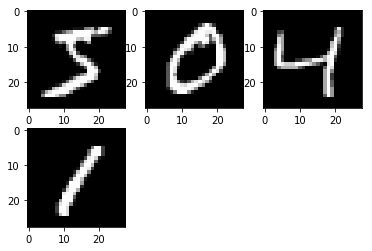

In [10]:
#Plot 4 images of dataset
plt.subplot(231)
plt.imshow(Xtrain[0],cmap=plt.get_cmap('gray'))
plt.subplot(232)
plt.imshow(Xtrain[1],cmap=plt.get_cmap('gray'))
plt.subplot(233)
plt.imshow(Xtrain[2],cmap=plt.get_cmap('gray'))
plt.subplot(234)
plt.imshow(Xtrain[3],cmap=plt.get_cmap('gray'))
plt.show()

In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [80]:
seed = 7
np.random.seed(seed)

In [81]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [82]:
X_train = X_train / 255
X_test = X_test / 255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [91]:
def baseline_model():
    model = Sequential()
    #A convolution layer with 32 Features ..  A 5 X 5 Filter ... The 
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [92]:
model = baseline_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 97s - loss: 0.2463 - acc: 0.9305 - val_loss: 0.0721 - val_acc: 0.9789
Epoch 2/10
 - 97s - loss: 0.0727 - acc: 0.9782 - val_loss: 0.0617 - val_acc: 0.9815
Epoch 3/10
 - 95s - loss: 0.0531 - acc: 0.9837 - val_loss: 0.0430 - val_acc: 0.9856
Epoch 4/10
 - 88s - loss: 0.0410 - acc: 0.9871 - val_loss: 0.0349 - val_acc: 0.9876
Epoch 5/10
 - 106s - loss: 0.0335 - acc: 0.9897 - val_loss: 0.0331 - val_acc: 0.9894
Epoch 6/10
 - 98s - loss: 0.0282 - acc: 0.9910 - val_loss: 0.0366 - val_acc: 0.9878
Epoch 7/10
 - 95s - loss: 0.0224 - acc: 0.9932 - val_loss: 0.0331 - val_acc: 0.9892
Epoch 8/10
 - 100s - loss: 0.0194 - acc: 0.9939 - val_loss: 0.0325 - val_acc: 0.9887
Epoch 9/10
 - 103s - loss: 0.0169 - acc: 0.9946 - val_loss: 0.0357 - val_acc: 0.9882
Epoch 10/10
 - 104s - loss: 0.0146 - acc: 0.9953 - val_loss: 0.0307 - val_acc: 0.9898
CNN Error: 1.02%
